In [1]:
# 导入需要使用的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# 读取数据
train_data_file = "./data2/train.csv"
test_data_file = "./data2/test.csv"

train_data = pd.read_csv(train_data_file, sep=',', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep=',', encoding='utf-8')

In [3]:
# 查看数据信息
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114624 entries, 0 to 114623
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    114624 non-null  object 
 1   ActivePower                   91160 non-null   float64
 2   AmbientTemperatue             90625 non-null   float64
 3   BearingShaftTemperature       59328 non-null   float64
 4   Blade1PitchAngle              38406 non-null   float64
 5   Blade2PitchAngle              38301 non-null   float64
 6   Blade3PitchAngle              38301 non-null   float64
 7   ControlBoxTemperature         58972 non-null   float64
 8   GearboxBearingTemperature     59350 non-null   float64
 9   GearboxOilTemperature         59246 non-null   float64
 10  GeneratorRPM                  59103 non-null   float64
 11  GeneratorWinding1Temperature  59235 non-null   float64
 12  GeneratorWinding2Temperature  59257 non-null

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    3600 non-null   object 
 1   AmbientTemperatue             3192 non-null   float64
 2   BearingShaftTemperature       3190 non-null   float64
 3   Blade1PitchAngle              3590 non-null   float64
 4   Blade2PitchAngle              3590 non-null   float64
 5   Blade3PitchAngle              3590 non-null   float64
 6   ControlBoxTemperature         3188 non-null   float64
 7   GearboxBearingTemperature     3190 non-null   float64
 8   GearboxOilTemperature         3192 non-null   float64
 9   GeneratorRPM                  3192 non-null   float64
 10  GeneratorWinding1Temperature  3192 non-null   float64
 11  GeneratorWinding2Temperature  3192 non-null   float64
 12  HubTemperature                3189 non-null   float64
 13  Mai

In [5]:
train_data.drop(["Unnamed: 0","WTG"],axis=1,inplace=True)
test_data.drop(["Unnamed: 0","WTG"],axis=1,inplace=True)

In [6]:
train_data.drop(["ControlBoxTemperature"],axis=1,inplace=True)
test_data.drop(["ControlBoxTemperature"],axis=1,inplace=True)

In [7]:
train_data.dropna(axis=0, how='any', inplace=True)
test_data.dropna(axis=0, how='any', inplace=True)

In [8]:
# "TurbineStatus"为2.0在训练集上的占比
list(train_data['TurbineStatus']).count(2.0) / train_data.shape[0]

0.8756578059641074

In [9]:
#"TurbineStatus"为2.0在测试集上的占比
list(test_data['TurbineStatus']).count(2.0) / test_data.shape[0]

0.8824826717076244

In [10]:
train_data = train_data[train_data['TurbineStatus'].isin([2.0])]
test_data = test_data[test_data['TurbineStatus'].isin([2.0])]

In [11]:
train_data.drop(['TurbineStatus'],axis=1,inplace=True)
test_data.drop(['TurbineStatus'],axis=1,inplace=True)

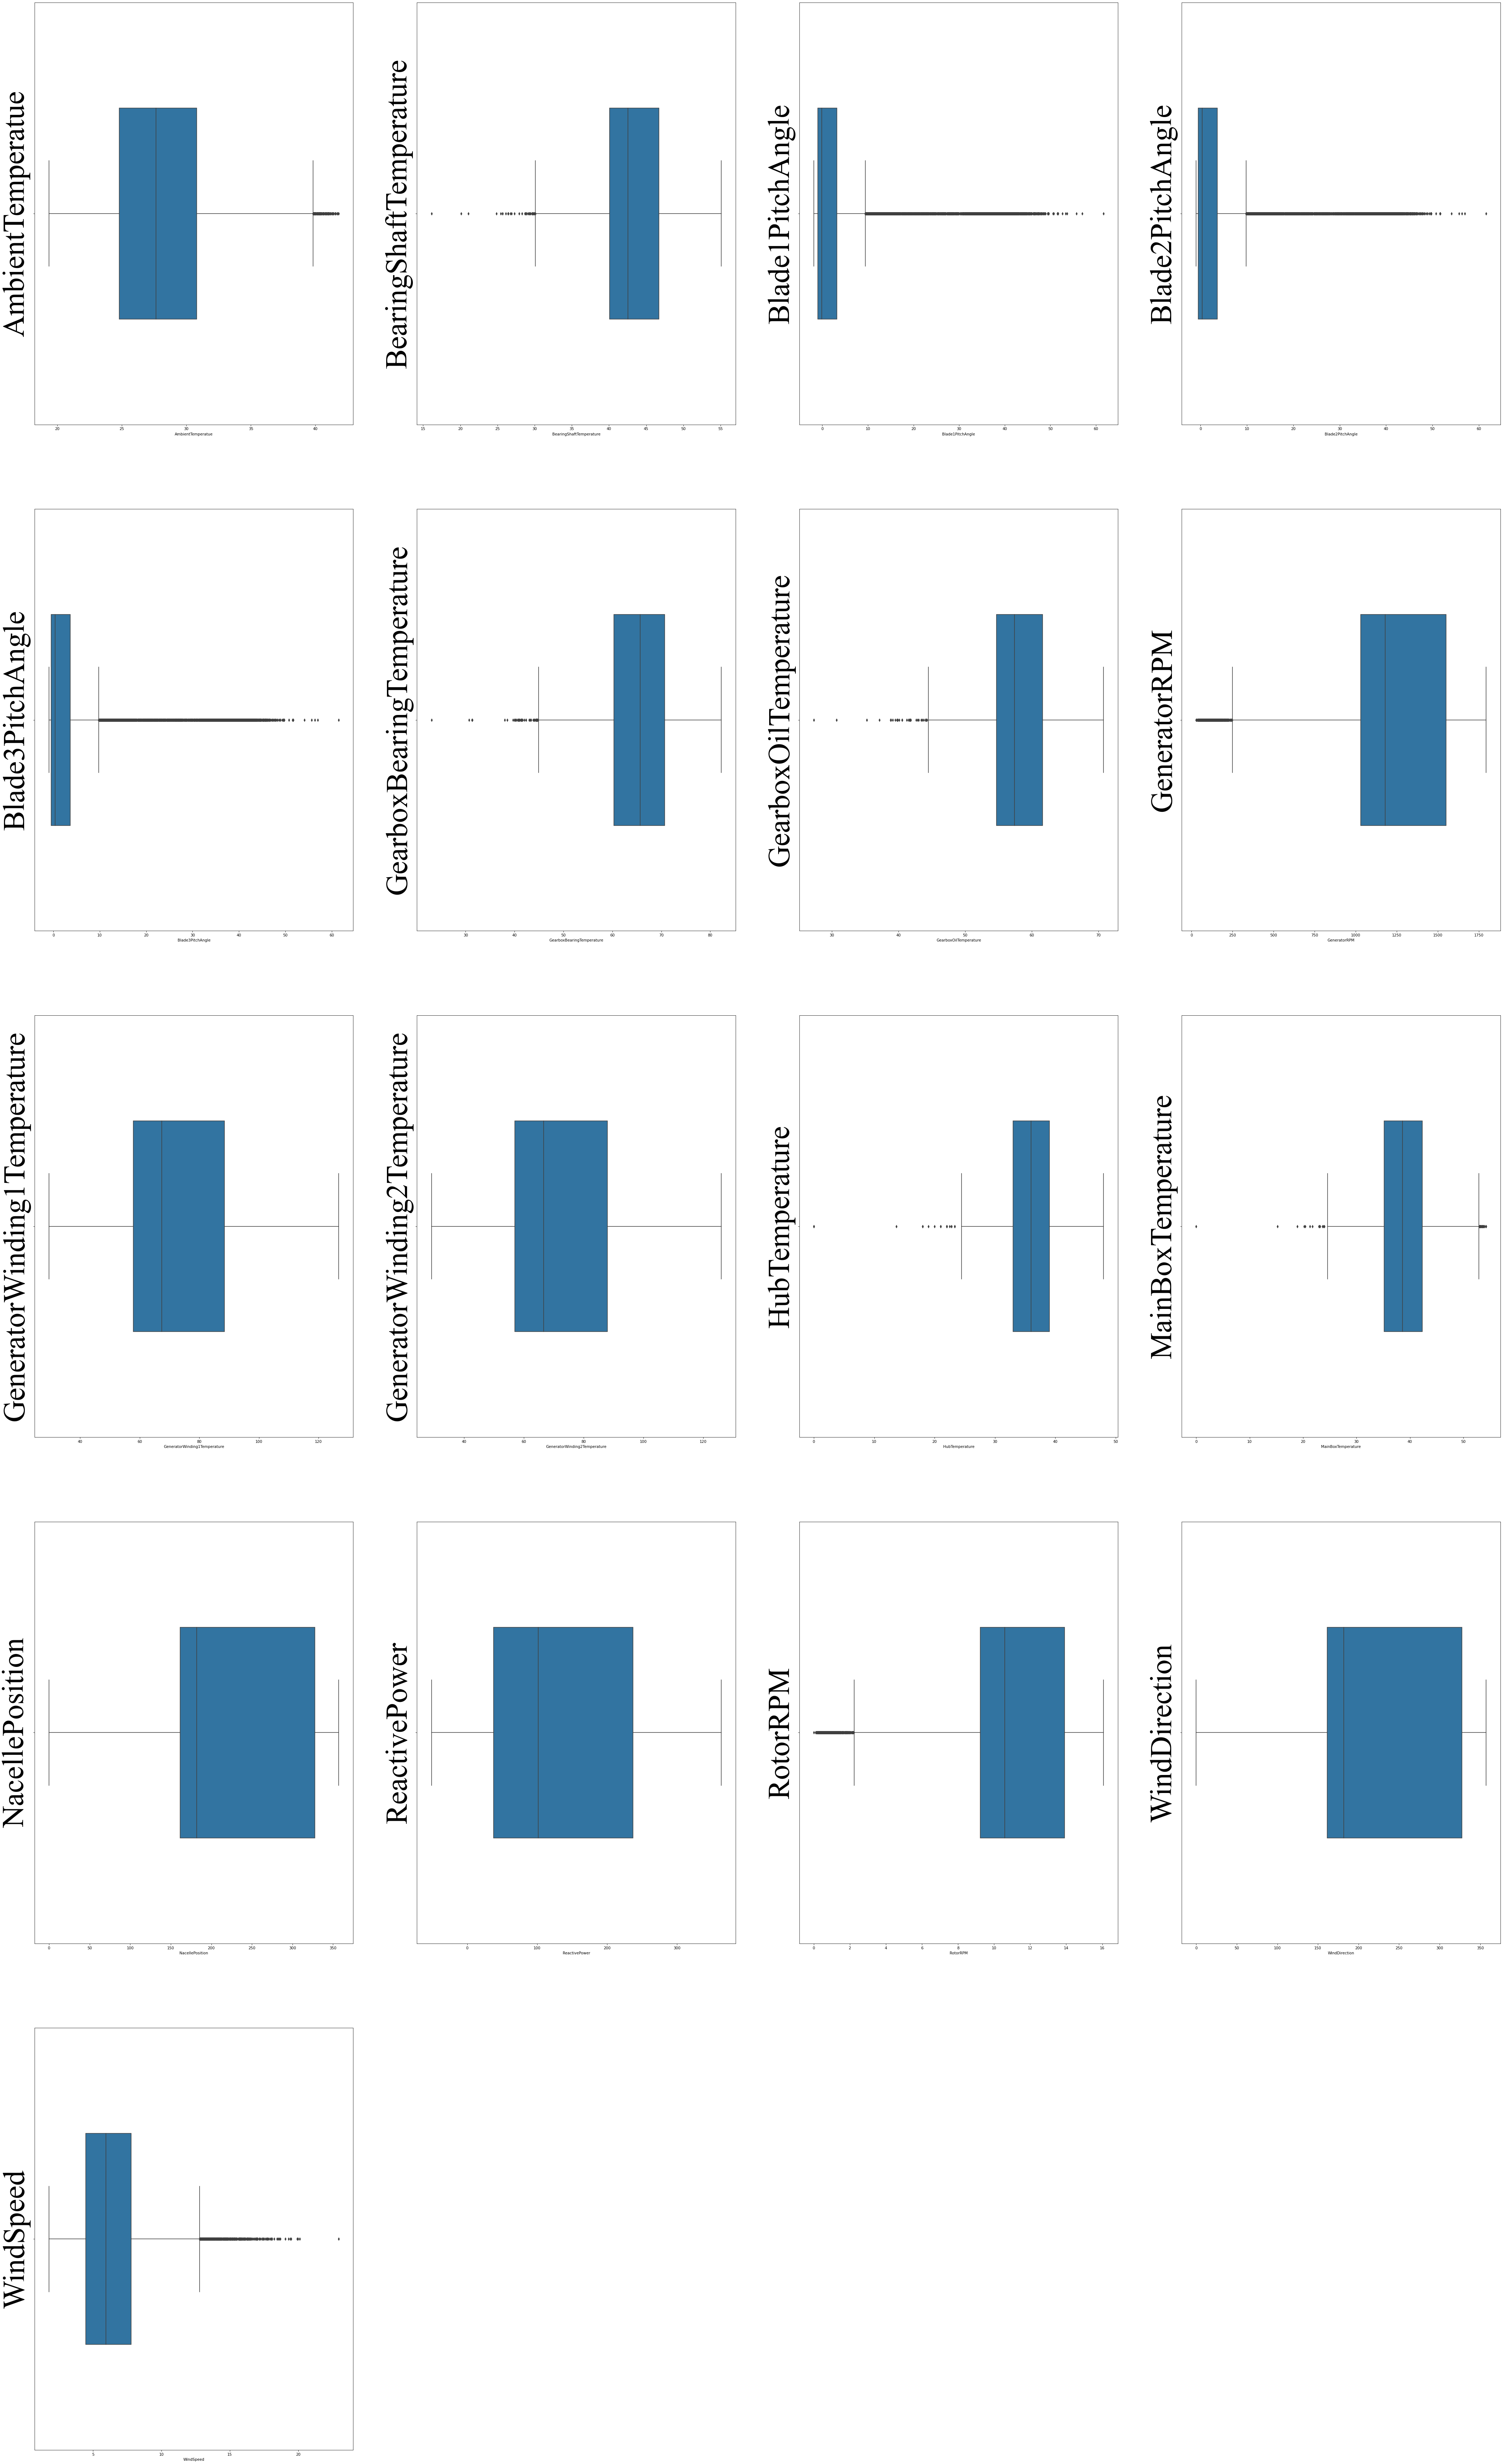

In [14]:
# 训练集对应特征箱形图
column = train_data.columns.tolist()[1:]
fig = mp.figure(figsize=(70,120),dpi=75)
for i in range(len(column)):
    mp.subplot(5,4,i+1)
    sns.boxplot(train_data[column[i]],orient="v",width=0.5)
    mp.ylabel(column[i],fontsize=80,fontproperties='Times New Roman')
mp.show()

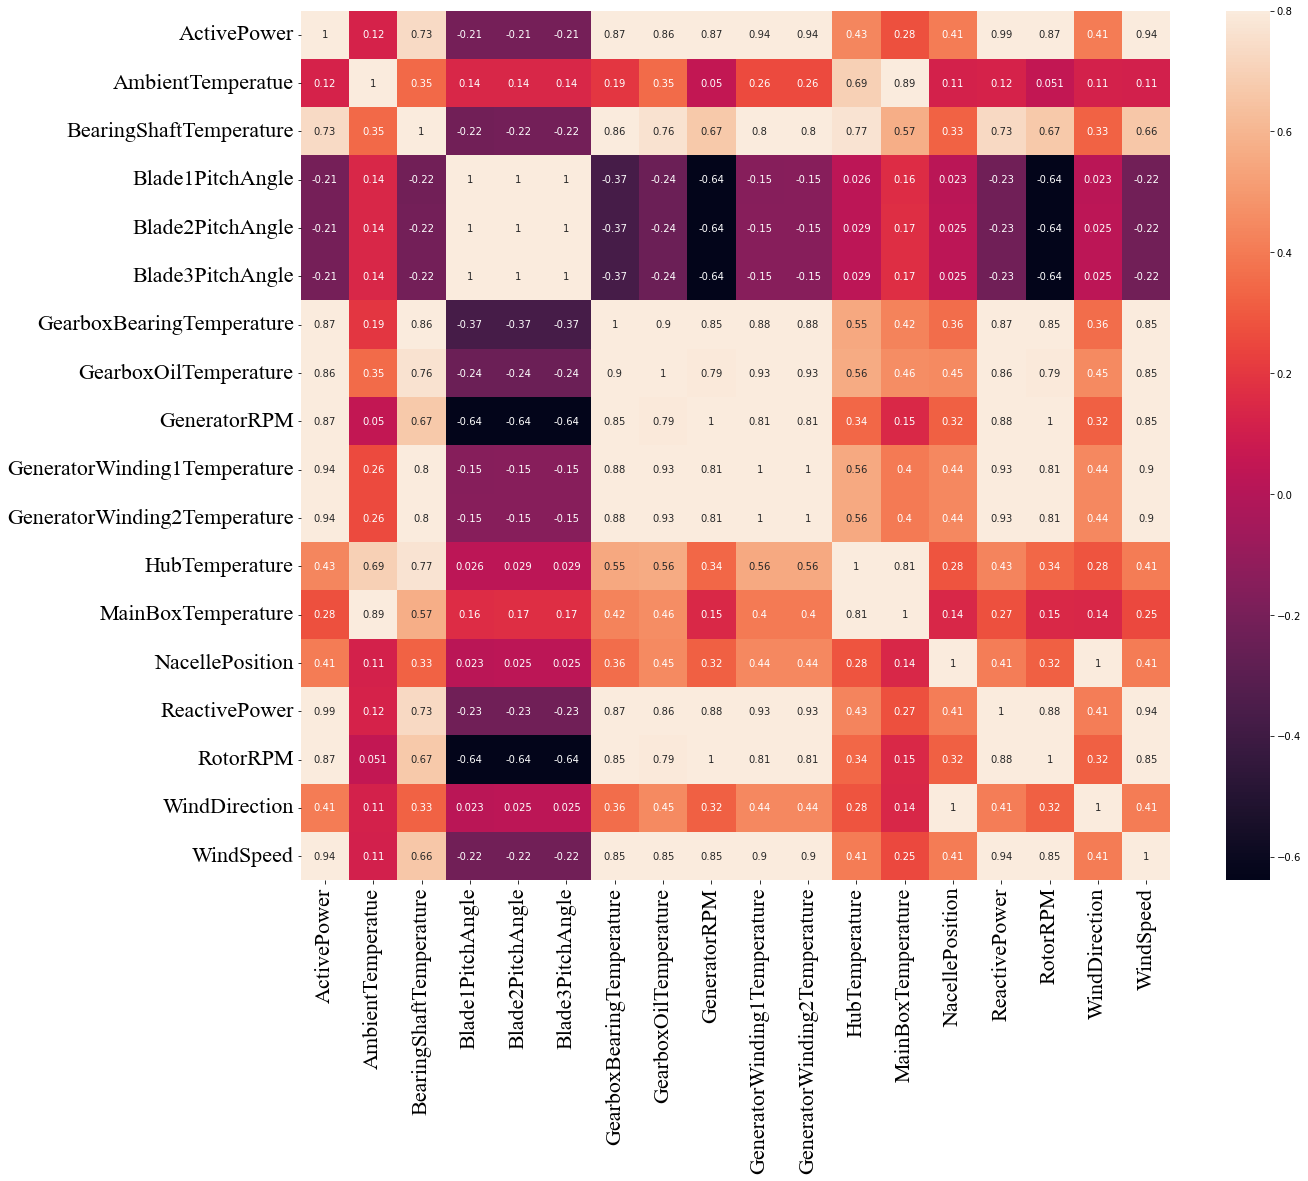

In [19]:
train_corr = train_data.corr()
ax = mp.subplots(figsize=(20,16))
mp.yticks(fontproperties='Times New Roman', size=22)  # 设置大小及加粗
mp.xticks(fontproperties='Times New Roman', size=22)
ax = sns.heatmap(train_corr,vmax=.8,square=True,annot=True)

In [15]:
train_data.drop(["Blade1PitchAngle","Blade2PitchAngle","NacellePosition","RotorRPM","GeneratorWinding1Temperature"],axis=1,inplace=True)
test_data.drop(["Blade1PitchAngle","Blade2PitchAngle","NacellePosition","RotorRPM","GeneratorWinding1Temperature"],axis=1,inplace=True)

R2= 0.8885056363230488
mse= 0.7169665961720976
---------------------------------------
mean of residuals: -5.020510806787865e-16
std of residuals: 0.8467551106971939
---------------------------------------
881 outliers:
[70851, 71158, 71791, 72068, 72351, 72352, 72353, 72354, 72355, 72356, 73670, 74388, 74389, 74390, 74391, 74392, 74393, 74394, 74613, 74674, 74675, 75446, 75458, 75682, 75683, 75684, 75685, 75687, 75688, 75690, 75692, 75950, 76249, 76400, 76499, 76520, 76571, 76717, 76772, 77031, 77160, 77198, 78109, 78235, 78264, 78265, 78267, 78268, 78270, 78271, 78272, 78273, 78274, 78275, 78310, 78360, 78361, 78362, 78363, 78364, 78368, 78369, 78374, 78375, 78377, 78378, 78379, 78380, 78381, 78382, 78388, 78389, 78390, 78391, 78397, 78401, 78405, 78407, 78408, 78410, 78412, 78415, 78416, 78420, 78525, 78527, 78530, 78532, 78533, 78538, 78539, 78540, 78542, 78549, 78550, 78552, 78553, 78557, 78558, 78563, 78564, 78571, 78572, 78627, 78653, 78654, 78658, 78660, 78662, 78663, 78664, 78

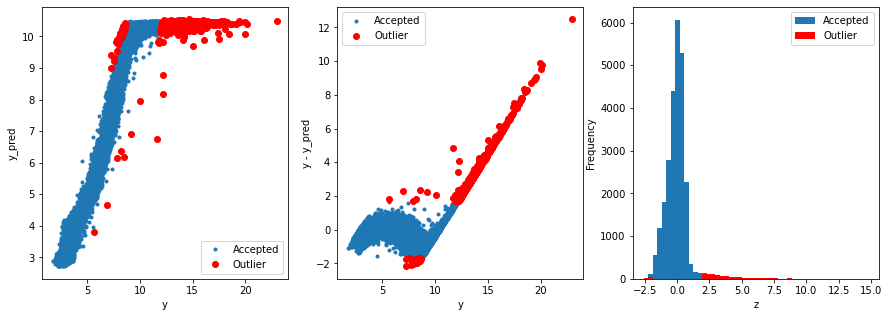

In [16]:
def find_outliers(model, X, y, sigma=2):

    # predict y values using model
    try:
        y_pred = pd.Series(model.predict(X), index=y.index)
    # if predicting fails, try fitting the model first
    except:
        model.fit(X,y)
        y_pred = pd.Series(model.predict(X), index=y.index)
        
    # calculate residuals between the model prediction and true y values
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()

    # calculate z statistic, define outliers to be where |z|>sigma
    z = (resid - mean_resid)/std_resid    
    outliers = z[abs(z)>sigma].index
    
    # print and plot the results
    print('R2=',model.score(X,y))
    print("mse=",mean_squared_error(y,y_pred))
    print('---------------------------------------')

    print('mean of residuals:',mean_resid)
    print('std of residuals:',std_resid)
    print('---------------------------------------')

    print(len(outliers),'outliers:')
    print(outliers.tolist())

    mp.figure(figsize=(15,5))
    ax_131 = mp.subplot(1,3,1)
    mp.plot(y,y_pred,'.')
    mp.plot(y.loc[outliers],y_pred.loc[outliers],'ro')
    mp.legend(['Accepted','Outlier'])
    mp.xlabel('y')
    mp.ylabel('y_pred');

    ax_132=mp.subplot(1,3,2)
    mp.plot(y,y-y_pred,'.')
    mp.plot(y.loc[outliers],y.loc[outliers]-y_pred.loc[outliers],'ro')
    mp.legend(['Accepted','Outlier'])
    mp.xlabel('y')
    mp.ylabel('y - y_pred');

    ax_133=mp.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    z.loc[outliers].plot.hist(color='r',bins=50,ax=ax_133)
    mp.legend(['Accepted','Outlier'])
    mp.xlabel('z')
    
    mp.savefig('outliers.png')
    
    return outliers

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
X_train=train_data.iloc[:,0:-1]
y_train=train_data.iloc[:,-1]
outliers = find_outliers(Lasso(), X_train, y_train)

In [17]:
# 删除异常值所在的行
train_data.drop(outliers.tolist(),axis=0,inplace=True)

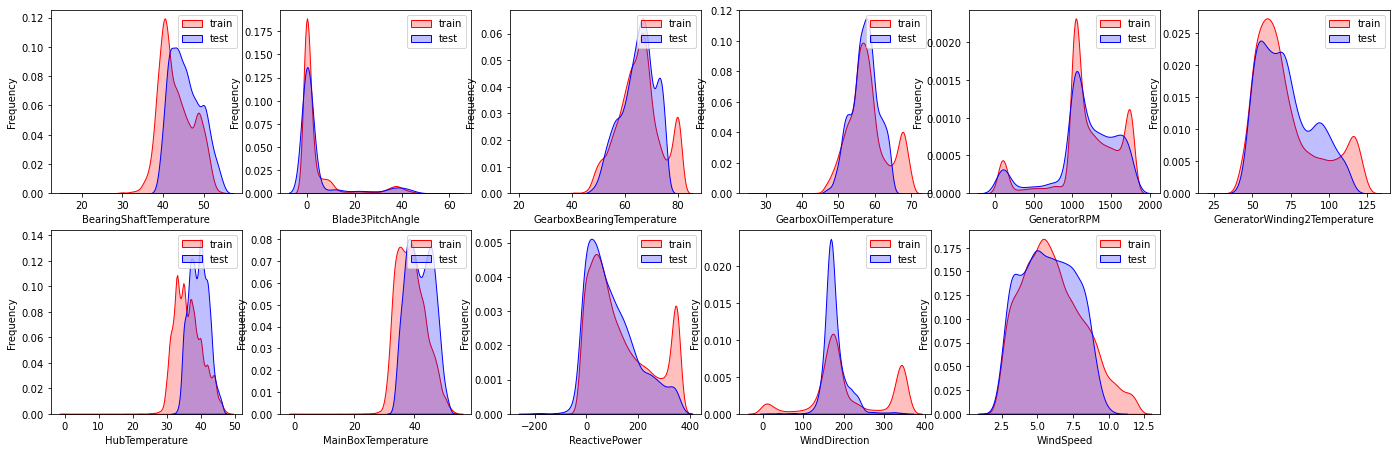

In [18]:
dist_cols = 6
dist_rows = len(test_data.columns)
mp.figure(figsize=(dist_cols * 4, dist_rows * 4))
i = 1
for col in test_data.columns[1:]:
    ax = mp.subplot(dist_rows,dist_cols,i)
    ax = sns.kdeplot(train_data[col],color='r',shade=True)
    ax = sns.kdeplot(test_data[col],color='b',shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.legend(['train','test'])
    i += 1
    
mp.show()

In [19]:
# 将target从训练集中分离出来
target_data = train_data.iloc[:,0]
train_data.drop(['ActivePower'],axis=1,inplace=True)

In [20]:
train_data.describe()

,AmbientTemperatue,BearingShaftTemperature,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,ReactivePower,WindDirection,WindSpeed
count,25077.000000,25077.000000,25077.000000,25077.000000,25077.000000,25077.000000,25077.000000,25077.000000,25077.000000,25077.000000,25077.000000,25077.000000
mean,27.931336,43.175555,4.446122,65.401632,58.017992,1190.919136,72.551940,36.318242,38.822831,132.117400,207.945217,6.081045
std,4.049509,4.192393,10.308897,8.046538,5.442812,421.532367,21.277868,3.971573,4.718790,117.192721,91.537321,2.173223
min,19.361880,16.119878,-0.934926,23.007950,27.300446,28.631626,29.136874,0.000000,0.000000,-51.037937,0.000000,1.779016
25%,24.711141,40.007672,-0.474712,60.119453,54.582423,1030.094675,56.755625,33.003815,35.096036,35.758350,160.000000,4.404155
50%,27.523656,42.370070,0.243882,65.424527,57.263664,1160.922940,65.924366,35.993021,38.429982,95.926977,182.000000,5.825933
75%,30.640767,46.373607,2.376275,69.877034,60.731776,1508.437856,83.940673,38.996185,42.018999,218.779085,311.000000,7.541763
max,41.809714,55.088655,61.532303,82.237932,70.764581,1793.657150,125.439761,47.996185,54.230154,361.030644,357.000000,12.140469


In [21]:
test_data.describe()

,AmbientTemperatue,BearingShaftTemperature,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,ReactivePower,WindDirection,WindSpeed
count,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000,2801.000000
mean,29.927352,45.576780,4.443013,64.875289,57.120729,1160.909938,72.028002,39.337327,41.754948,98.896540,177.666652,5.760593
std,3.926369,3.751634,11.091135,6.320869,3.657847,416.931077,17.507804,2.707254,4.208388,96.293505,29.945021,1.842379
min,22.891492,38.645542,-0.872639,47.271293,46.579634,30.834318,42.404153,33.003815,33.376494,-203.182591,11.500000,1.938894
25%,26.476792,42.475130,-0.494607,60.702650,54.794411,1030.010978,57.498903,37.003815,38.180556,23.537405,163.000000,4.239863
50%,29.546149,45.057949,0.036326,65.650887,57.289577,1159.493278,69.169490,39.217196,41.585938,76.286961,172.000000,5.736279
75%,33.449570,48.449519,1.815649,69.417308,59.482486,1465.298378,84.305525,41.012085,45.337856,154.395917,185.857143,7.292283
max,38.113558,54.927744,55.724454,75.777158,64.901421,1768.692987,114.903667,45.996185,51.289062,350.091543,354.000000,10.172570


# 训练模型

In [22]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

from sklearn.model_selection import learning_curve,ShuffleSplit

In [23]:
train = train_data
target = target_data
test = test_data

In [24]:
train_data , test_data , train_target , test_target = train_test_split(train,target,test_size=0.1,random_state=0)

In [25]:
# 归一化
feature_columns = list(train_data.columns)
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler = min_max_scaler.fit(train_data[feature_columns])

train_data = pd.DataFrame(min_max_scaler.transform(train_data[feature_columns]))
test_data = pd.DataFrame(min_max_scaler.transform(test_data[feature_columns]))

In [26]:
clf = LinearRegression()
clf.fit(train_data,train_target)
score = mean_absolute_percentage_error(test_target,clf.predict(test_data))
# MAPE = np.mean(np.abs((test_target - clf.predict(test_data)) / test_target))
print("LinearRegression: ",score)

LinearRegression:  1.6908119357308729


In [27]:
clf = Lasso()
clf.fit(train_data,train_target)
score = mean_absolute_percentage_error(test_target,clf.predict(test_data))
# MAPE = np.mean(np.abs((test_target - clf.predict(test_data)) / test_target))
print("LinearRegression: ",score)

LinearRegression:  0.8593146663501825


In [28]:
clf = Ridge()
clf.fit(train_data,train_target)
score = mean_absolute_percentage_error(test_target,clf.predict(test_data))
# MAPE = np.mean(np.abs((test_target - clf.predict(test_data)) / test_target))
print("LinearRegression: ",score)

LinearRegression:  1.6514866040676883


In [29]:
clf = KNeighborsRegressor(n_neighbors=8)
clf.fit(train_data, train_target)
score = mean_absolute_percentage_error(test_target,clf.predict(test_data))
# MAPE = np.mean(np.abs((test_target - clf.predict(test_data)) / test_target))
print("KNeighborsRegression: ",score)

KNeighborsRegression:  0.3315235913001021


In [30]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100)
clf.fit(train_data, train_target)
score = mean_absolute_percentage_error(test_target,clf.predict(test_data))
MAPE = np.mean(np.abs((test_target - clf.predict(test_data)) / test_target))
print("RandomForestRegression: ",score)
print(MAPE)

RandomForestRegression:  0.06576902759902385
0.06576902759902413
